# Réseaux de neurones convolutionnels

In [1]:
import tensorflow.keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import Conv2D
import matplotlib.pyplot as plt

In [12]:
(x_train, y_train), (x_val, y_val) = mnist.load_data()
batch_size = 128
num_classes = 10
epochs = 8

In [13]:
# Ajout de l'indication du canal sur le images pour le traitement via réseau convolutionnel
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_val = x_val.reshape(x_val.shape[0], 28, 28, 1)

In [14]:
# normalisation
x_train, x_val = x_train/255., x_val/255.
# 1-hot encoding
y_train, y_val = to_categorical(y_train, dtype='int8'), to_categorical(y_val, dtype='int8')# normalisation

print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)

x_train shape: (60000, 28, 28, 1)
y_train shape: (60000, 10)


In [15]:
model = Sequential(name="conv1")
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28, 28, 1), name="convolution"))
model.add(Flatten( name="vectorisation"))
model.add(Dense(128, activation='relu', name="completement_connecte"))
model.add(Dense(num_classes, activation='softmax', name="classification"))
model.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])
model.summary()

Model: "conv1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
convolution (Conv2D)         (None, 26, 26, 32)        320       
_________________________________________________________________
vectorisation (Flatten)      (None, 21632)             0         
_________________________________________________________________
completement_connecte (Dense (None, 128)               2769024   
_________________________________________________________________
classification (Dense)       (None, 10)                1290      
Total params: 2,770,634
Trainable params: 2,770,634
Non-trainable params: 0
_________________________________________________________________


In [16]:
import time
from math import trunc

heure_de_debut = time.time()
# On utilise l'ensemble de test comme validation, pas très heureux en général...
historique = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=2,
          validation_data=(x_val, y_val))

temps_de_calcul = time.time() - heure_de_debut
print("Temps de calcul: {:d} s".format(trunc(temps_de_calcul)))

Train on 60000 samples, validate on 10000 samples
Epoch 1/8
60000/60000 - 37s - loss: 0.1869 - accuracy: 0.9456 - val_loss: 0.0736 - val_accuracy: 0.9778
Epoch 2/8
60000/60000 - 35s - loss: 0.0565 - accuracy: 0.9828 - val_loss: 0.0569 - val_accuracy: 0.9825
Epoch 3/8
60000/60000 - 37s - loss: 0.0324 - accuracy: 0.9902 - val_loss: 0.0489 - val_accuracy: 0.9843
Epoch 4/8
60000/60000 - 40s - loss: 0.0203 - accuracy: 0.9939 - val_loss: 0.0515 - val_accuracy: 0.9837
Epoch 5/8
60000/60000 - 35s - loss: 0.0118 - accuracy: 0.9965 - val_loss: 0.0534 - val_accuracy: 0.9840
Epoch 6/8
60000/60000 - 37s - loss: 0.0089 - accuracy: 0.9974 - val_loss: 0.0599 - val_accuracy: 0.9827
Epoch 7/8
60000/60000 - 45s - loss: 0.0058 - accuracy: 0.9983 - val_loss: 0.0625 - val_accuracy: 0.9839
Epoch 8/8
60000/60000 - 49s - loss: 0.0059 - accuracy: 0.9982 - val_loss: 0.0538 - val_accuracy: 0.9847
Temps de calcul: 314 s


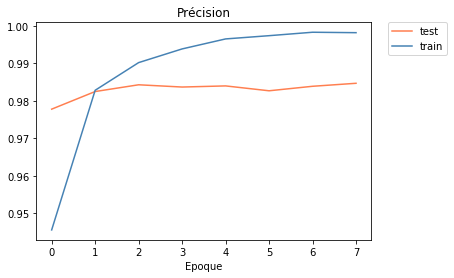

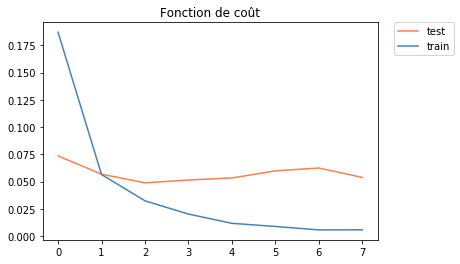

In [17]:
# Représentation des résultats
accuracy_train = historique.history['accuracy']
accuracy_test = historique.history['val_accuracy']
loss_train = historique.history['loss']
loss_test = historique.history['val_loss']
# Précision
plt.plot(accuracy_test, c='coral', label='test')
plt.plot(accuracy_train, c='steelblue', label='train')
plt.xlabel('Epoque')
plt.title('Précision')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()
# Fonction de coût
plt.plot(loss_test, c='coral', label='test')
plt.plot(loss_train, c='steelblue', label='train')
plt.title('Fonction de coût')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()